In [180]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [181]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [182]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from pathlib import Path
from sqlalchemy import create_engine, text
from sqlalchemy import and_, or_, not_
from sqlalchemy import desc
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [183]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [184]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)


In [185]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [186]:
# Save references to each table
Measurement = Base.classes.measurement #station,date,prcp,tobs
Station = Base.classes.station #station,name,latitude,longitude,elevation


In [187]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [188]:
# Find the most recent date in the data set.
max_date = session.query(func.max(Measurement.date)).first()
max_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

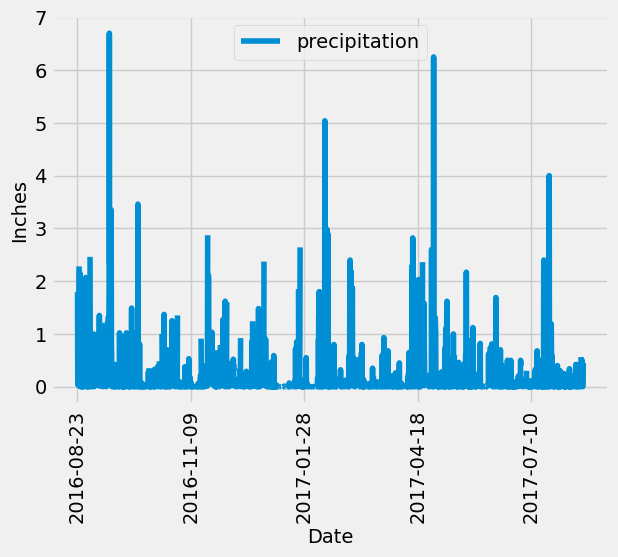

In [189]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# create one variable and use dt.date and dt.timedelay to save the data.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# inside this query use session.query and use the filter mathod to save the results. 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
#create pandas dataframe using columns date and precipitation
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
# use sort_values in dataframe.
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
#use plot to create the plot and add the x and y labels
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


In [190]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = pd.DataFrame(df["precipitation"].describe())
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [191]:
# Design a query to calculate the total number of stations in the dataset
stations_number = session.query(Station.station).count()
stations_number

9

In [192]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

stations_precip = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
stations_precip



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

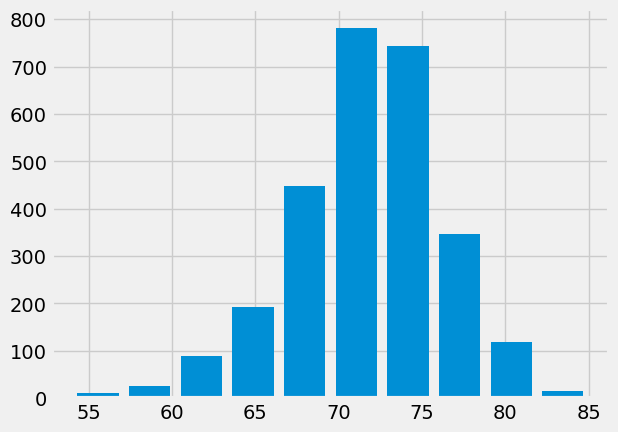

In [199]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
station_data = session.query(Measurement.tobs).filter(and_(Measurement.station == 'USC00519281'), (Measurement.date >= prev_year)).all()
#newdf = pd.DataFrame(station_data)
plt.hist(station_data_df['tobs'], histtype='bar', rwidth=0.8)
#newdf.count()
plt.show()

# Close Session

In [179]:
# Close Session
session.close()